In [117]:
import netCDF4
import numpy as np
from matplotlib import pyplot as plt


In [118]:
datafile = "/Users/seth.urion/src/Skagit-IBM/reepicheep/test3/output_0.nc"

In [119]:
ds = netCDF4.Dataset(datafile)

In [120]:
ds.variables

{'sampleSiteID': <class 'netCDF4._netCDF4.Variable'>
 int32 sampleSiteID(sampleHistoryLength)
 unlimited dimensions: 
 current shape = (408528,)
 filling on, default _FillValue of -2147483647 used,
 'sampleTime': <class 'netCDF4._netCDF4.Variable'>
 int32 sampleTime(sampleHistoryLength)
 unlimited dimensions: 
 current shape = (408528,)
 filling on, default _FillValue of -2147483647 used,
 'samplePop': <class 'netCDF4._netCDF4.Variable'>
 int32 samplePop(sampleHistoryLength)
 unlimited dimensions: 
 current shape = (408528,)
 filling on, default _FillValue of -2147483647 used,
 'sampleMeanMass': <class 'netCDF4._netCDF4.Variable'>
 float32 sampleMeanMass(sampleHistoryLength)
 unlimited dimensions: 
 current shape = (408528,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'sampleMeanLength': <class 'netCDF4._netCDF4.Variable'>
 float32 sampleMeanLength(sampleHistoryLength)
 unlimited dimensions: 
 current shape = (408528,)
 filling on, default _FillValue of 9.9692099683

In [121]:
import xarray as xr
import pandas as pd

In [122]:
dsx = xr.open_dataset(datafile)
df = dsx.to_dataframe()

In [125]:
df.to_csv('./reepicheep/test3/output_0.csv')

In [126]:
df[df.sampleMeanSpawnTime > 0]

,sampleSiteID,sampleTime,samplePop,sampleMeanMass,sampleMeanLength,sampleMeanSpawnTime
sampleHistoryLength,,,,,,
1023,1023,12,1,1.205475,48.640751,3.000000
1025,1025,12,7,1.047395,48.156700,0.857143
1026,1026,12,4,1.250425,51.620960,1.000000
1027,1027,12,2,0.955323,48.291618,1.500000
1029,1029,12,2,1.350991,52.030518,1.500000
...,...,...,...,...,...,...
375603,1119,3708,2,0.297112,30.533016,2217.000000
375640,1156,3708,1,0.456105,37.554329,2735.000000
376352,1868,3708,1,2.442499,60.101543,2182.000000


In [127]:
big_file = '/Users/seth.urion/src/Skagit-IBM/reepicheep/test3/summary_0.nc'
# dsx2 = xr.open_dataset(big_file)
# df2 = dsx2.to_dataframe()
ds = netCDF4.Dataset(big_file)
ds.variables

{'recruitTime': <class 'netCDF4._netCDF4.Variable'>
 int32 recruitTime(n)
 unlimited dimensions: 
 current shape = (6278381,)
 filling on, default _FillValue of -2147483647 used,
 'exitTime': <class 'netCDF4._netCDF4.Variable'>
 int32 exitTime(n)
 unlimited dimensions: 
 current shape = (6278381,)
 filling on, default _FillValue of -2147483647 used,
 'entryForkLength': <class 'netCDF4._netCDF4.Variable'>
 float32 entryForkLength(n)
 unlimited dimensions: 
 current shape = (6278381,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'entryMass': <class 'netCDF4._netCDF4.Variable'>
 float32 entryMass(n)
 unlimited dimensions: 
 current shape = (6278381,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'finalForkLength': <class 'netCDF4._netCDF4.Variable'>
 float32 finalForkLength(n)
 unlimited dimensions: 
 current shape = (6278381,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'finalMass': <class 'netCDF4._netCDF4.Variable'>
 float32 fina

In [128]:
ds['finalStatus']

<class 'netCDF4._netCDF4.Variable'>
int32 finalStatus(n)
unlimited dimensions: 
current shape = (6278381,)
filling on, default _FillValue of -2147483647 used

In [129]:
status = ds.variables['finalStatus'][:]


In [130]:
ds.variables[status == 4]

TypeError: unhashable type: 'MaskedArray'

In [131]:
exited = ds.variables['finalStatus'][:]

In [132]:
exited

masked_array(data=[3, 3, 3, ..., 0, 0, 0],
             mask=False,
       fill_value=999999,
            dtype=int32)

In [133]:
xx = np.argwhere(ds.variables['finalStatus'][:] == 4)
# print(xx)
exited = []
for x in xx:
    # print(x)
    exited.append(ds['finalForkLength'][x].data[0])

In [134]:
xx = np.argwhere(ds.variables['finalStatus'][:] == 3)
# print(xx)
starved = []
for x in xx:
    # print(x)
    starved.append(ds['finalForkLength'][x].data[0])

In [135]:
xx = np.argwhere(ds.variables['finalStatus'][:] == 0)
# print(xx)
alive = []
for x in xx:
    # print(x)
    alive.append(ds['finalForkLength'][x].data[0])

In [142]:
xx = np.argwhere(ds.variables['finalStatus'][:] == 1)
# print(xx)
mort = []
for x in xx:
    # print(x)
    mort.append(ds['finalForkLength'][x].data[0])

In [148]:
print('Exited:    ' + str(len(exited)))
print('Starved:   ' + str(len(starved)))
print('Alive:     ' + str(len(alive)))
print('Mortality: ' + str(len(mort)))

Exited:    516
Starved:   4164167
Alive:     2111937
Mortality: 1761


<function matplotlib.pyplot.show(close=None, block=None)>

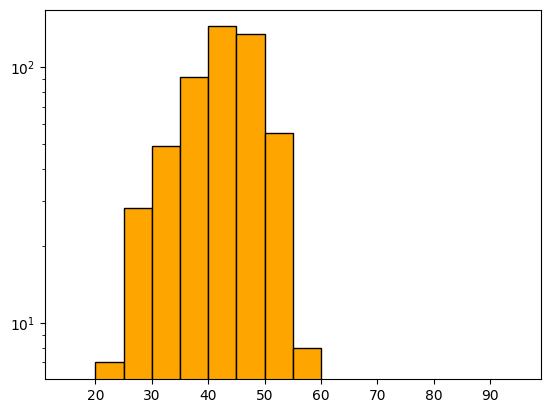

In [144]:
plt.hist(exited, [x for x in range(15, 100, 5)], color="orange", edgecolor="black")
plt.yscale('log')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

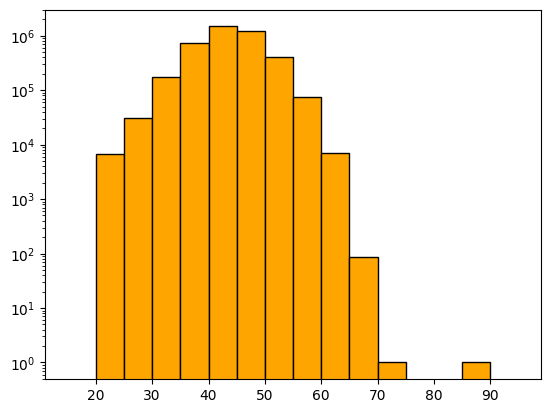

In [145]:
plt.hist(starved, [x for x in range(15, 100, 5)], color="orange", edgecolor="black")
plt.yscale('log')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

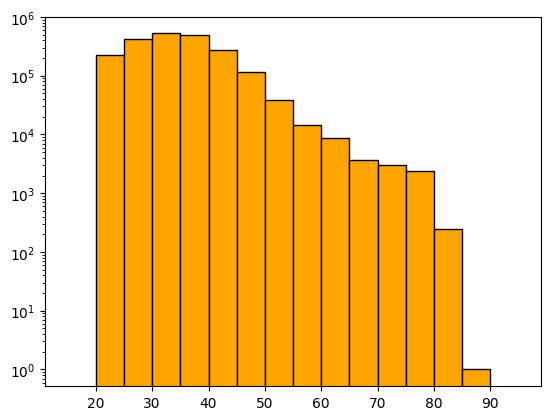

In [146]:
plt.hist(alive, [x for x in range(15, 100, 5)], color="orange", edgecolor="black")
plt.yscale('log')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

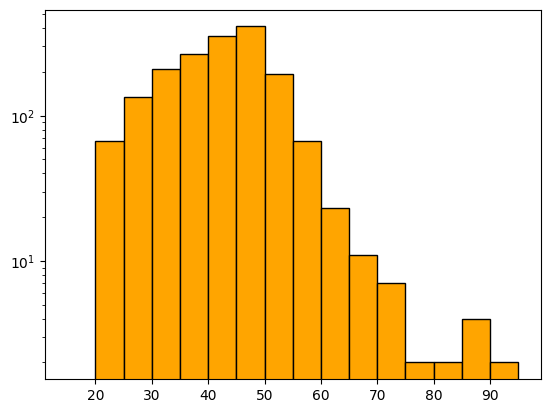

In [147]:
plt.hist(mort, [x for x in range(15, 100, 5)], color="orange", edgecolor="black")
plt.yscale('log')
plt.show

In [ ]:
"""`status[n]`: ints, current/final status of each fish
        - 0: Alive
        - 1: Dead from mortality risk
        - 2: Dead from stranding
        - 3: Dead from starvation
        - 4: Exited"""


'`status[n]`: ints, current/final status of each fish\n        - 0: Alive\n        - 1: Dead from mortality risk\n        - 2: Dead from stranding\n        - 3: Dead from starvation\n        - 4: Exited'

In [ ]:
dsx2.groupby(round(dsx2.finalForkLength, 0)).count()

TypeError: type DataArray doesn't define __round__ method

In [ ]:
dsx2.finalForkLength.values

array([36.83105 , 40.4159  , 32.07501 , ..., 53.74385 , 52.806934,
       61.05795 ], dtype=float32)

In [ ]:
fl_bins = [75, 85]
dsx2.groupby_bins(dsx2.finalForkLength, fl_bins).count()

<xarray.Dataset>
Dimensions:               (finalForkLength_bins: 1, monitoringPoints: 281,
                           historyLength: 3984)
Coordinates:
  * finalForkLength_bins  (finalForkLength_bins) object (75, 85]
Dimensions without coordinates: monitoringPoints, historyLength
Data variables:
    recruitTime           (finalForkLength_bins) int64 2583
    exitTime              (finalForkLength_bins) int64 2583
    entryForkLength       (finalForkLength_bins) int64 2583
    entryMass             (finalForkLength_bins) int64 2583
    finalForkLength       (finalForkLength_bins) int64 2583
    finalMass             (finalForkLength_bins) int64 2583
    finalStatus           (finalForkLength_bins) int64 2583
    monitoringPopulation  (finalForkLength_bins, monitoringPoints, historyLength) int64 ...
    monitoringDepth       (finalForkLength_bins, monitoringPoints, historyLength) int64 ...
    monitoringTemp        (finalForkLength_bins, monitoringPoints, historyLength) int64 ...
    monitoringPointIDs    (finalForkLength_bins, monitoringPoints) int64 1 ... 1

In [ ]:
graph = np.histogram(np.array(dsx2.finalForkLength).astype(int), [15, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125])

<function matplotlib.pyplot.show(close=None, block=None)>

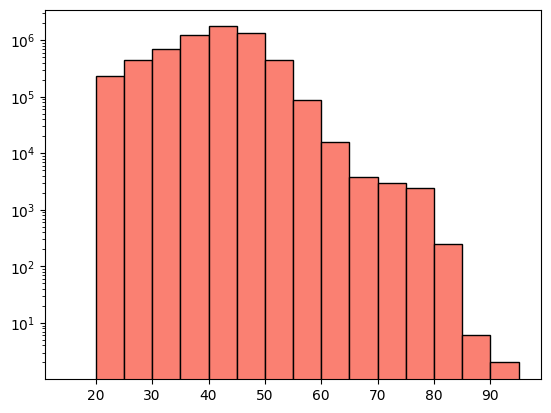

In [207]:
plt.hist(np.array(ds.variables['finalForkLength']).astype(int), [x for x in range(15, 100, 5)], color="salmon", edgecolor="black")
plt.yscale('log')
plt.show

In [ ]:
plt.hist(np.array(dsx2.finalForkLength).astype(int), [x for x in range(15, 100, 5)])
plt.yscale('log')
plt.show

In [149]:
df

,sampleSiteID,sampleTime,samplePop,sampleMeanMass,sampleMeanLength,sampleMeanSpawnTime
sampleHistoryLength,,,,,,
0,0,12,0,0.0,0.0,0.0
1,1,12,0,0.0,0.0,0.0
2,2,12,0,0.0,0.0,0.0
3,3,12,0,0.0,0.0,0.0
4,4,12,0,0.0,0.0,0.0
...,...,...,...,...,...,...
408523,34039,3708,0,0.0,0.0,0.0
408524,34040,3708,0,0.0,0.0,0.0
408525,34041,3708,0,0.0,0.0,0.0


In [152]:
nodes = pd.read_csv('data/sampling_nodes.csv')

In [169]:
nodes['Name'].unique()

array(['Grain of Sand', 'FWP New Site', 'Browns Sl Barrow Ch',
       'Browns Sl Diked Side', 'Ika Lower', 'Tom Moore', 'Ika Upper',
       'Cattail Saltmarsh', 'DW Reference E Blind',
       'Swin Ch Old Bridge Blind', 'Hall Sl Trib'], dtype=object)

In [182]:
nodes.keys()

Index(['Name', ' Node ID', ' Area (m^2)'], dtype='object')

In [236]:
print(f'{"Site Name" :25} {"m^2" :>8} {"nodes" :>8} {"∑pop" :>8}')
print('========================    ======   ======   ======')
for nodeName in nodes['Name'].unique():
    nodeIDs = [x for x in nodes[nodes.Name == nodeName][' Node ID']]
    print(f'{nodeName :25} {str(sum(nodes[nodes[' Node ID'].isin(nodeIDs)][' Area (m^2)'])) :>8} {str(len(df[df['sampleSiteID'].isin(nodeIDs)])) :>8} {str(sum(df[df['sampleSiteID'].isin(nodeIDs)]['samplePop'])) :>8}')

Site Name                      m^2    nodes     ∑pop
========================    ======   ======   ======
Grain of Sand                 2381      132        0
FWP New Site                   123       36        0
Browns Sl Barrow Ch           1337      948        0
Browns Sl Diked Side           444       12        0
Ika Lower                      304      108        0
Tom Moore                      514      468        0
Ika Upper                    55744      936        0
Cattail Saltmarsh             1378      180        0
DW Reference E Blind          2045     1020        0
Swin Ch Old Bridge Blind       503       96        0
Hall Sl Trib                   201      204        0


In [273]:
df[df.samplePop > 2]

,sampleSiteID,sampleTime,samplePop,sampleMeanMass,sampleMeanLength,sampleMeanSpawnTime
sampleHistoryLength,,,,,,
1025,1025,12,7,1.047395,48.156700,0.857143
1026,1026,12,4,1.250425,51.620960,1.000000
1031,1031,12,8,1.079311,47.987572,1.000000
1032,1032,12,4,1.189750,48.450512,2.500000
1034,1034,12,4,1.120545,48.452419,0.500000
...,...,...,...,...,...,...
375532,1048,3708,664032,0.472228,36.552303,2311.418945
375533,1049,3708,718494,0.463795,36.365662,2278.467773
375537,1053,3708,11,0.252241,31.180870,1785.363647


In [246]:
sum(df[df.sampleSiteID == 1049].samplePop)

6024388

In [241]:
df.sampleSiteID.mode()

0            0
1            1
2            2
3            3
4            4
         ...  
34039    34039
34040    34040
34041    34041
34042    34042
34043    34043
Name: sampleSiteID, Length: 34044, dtype: int32

In [271]:
nodeIDs = [x for x in nodes[nodes.Name == 'Ika Upper'][' Node ID']]
df[(df.sampleSiteID.isin(nodeIDs))]

,sampleSiteID,sampleTime,samplePop,sampleMeanMass,sampleMeanLength,sampleMeanSpawnTime
sampleHistoryLength,,,,,,
1013,1013,12,0,0.0,0.0,0.0
4481,4481,12,0,0.0,0.0,0.0
4952,4952,12,0,0.0,0.0,0.0
5385,5385,12,0,0.0,0.0,0.0
5386,5386,12,0,0.0,0.0,0.0
...,...,...,...,...,...,...
399509,25025,3708,0,0.0,0.0,0.0
399842,25358,3708,0,0.0,0.0,0.0
400067,25583,3708,0,0.0,0.0,0.0


In [243]:
df[df.samplePop > 0.5 * max(df.samplePop)]

,sampleSiteID,sampleTime,samplePop,sampleMeanMass,sampleMeanLength,sampleMeanSpawnTime
sampleHistoryLength,,,,,,
69129,1041,684,902194,0.925659,46.157269,341.262299
69136,1048,684,902122,0.925092,46.151157,341.413300
69137,1049,684,919900,0.933642,46.285336,338.323700
103173,1041,1020,1209042,0.851617,44.979012,477.487579
103180,1048,1020,1207075,0.851547,44.979473,478.736969
103181,1049,1020,1232247,0.862417,45.163395,473.769287
307437,1041,3036,624727,0.681850,41.486202,2203.027588
307445,1049,3036,654694,0.677866,41.434814,2188.512451
341481,1041,3372,662227,0.563525,38.955555,2258.838379


In [189]:
sum(df[df.samplePop > 0.5 * max(df.samplePop)]['samplePop'])

11723031

In [190]:
sum(df.samplePop)

17639411

In [191]:
sum(df.samplePop) - sum(df[df.samplePop > 0.5 * max(df.samplePop)]['samplePop'])

5916380

In [192]:
df.sampleTime.unique()

array([  12,  348,  684, 1020, 1356, 1692, 2028, 2364, 2700, 3036, 3372,
       3708], dtype=int32)

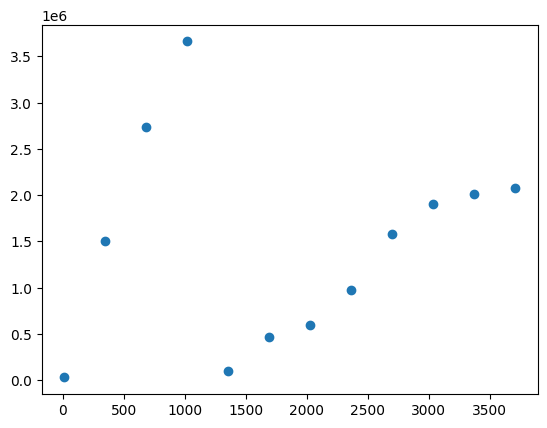

In [197]:
p = []
for t in df.sampleTime.unique():
    p.append(sum(df[df.sampleTime == t]['samplePop']))

plt.scatter(x=df.sampleTime.unique(), y=p)

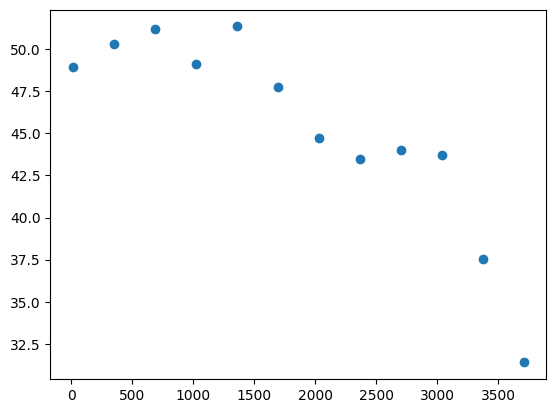

In [256]:
q = []
for t in df.sampleTime.unique():
    q.append(np.mean(df[(df.sampleTime == t) & (df.sampleMeanLength != 0)]['sampleMeanLength']))
plt.scatter(x = df.sampleTime.unique(), y = q)

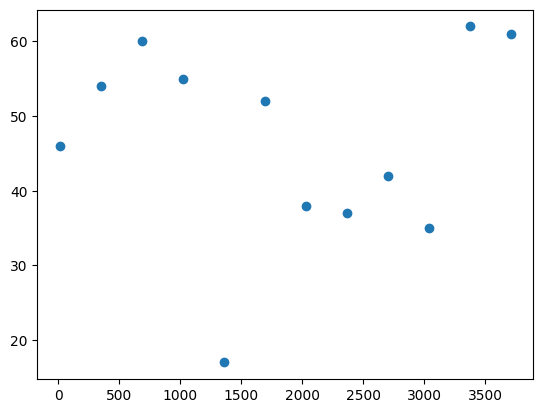

In [257]:
r = []
for t in df.sampleTime.unique():
    r.append(len(df[(df.sampleTime == t) & (df.sampleMeanLength != 0)]['sampleMeanLength']))
plt.scatter(x = df.sampleTime.unique(), y = r)

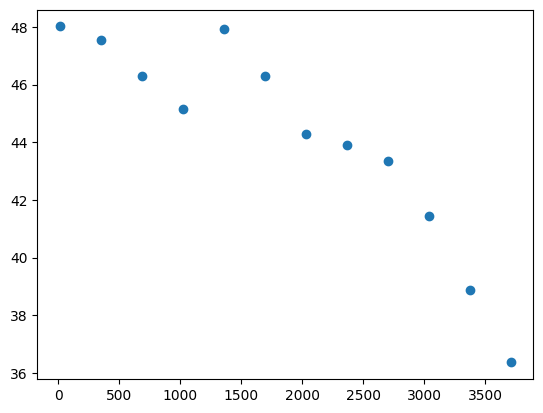

In [270]:
s = []
times = df.sampleTime.unique()
for t in times:
    s.append(np.mean(df[(df.sampleTime == t) & (df.sampleMeanLength != 0) & (df.sampleSiteID == 1049)]['sampleMeanLength']))
plt.scatter(x = times, y = s)

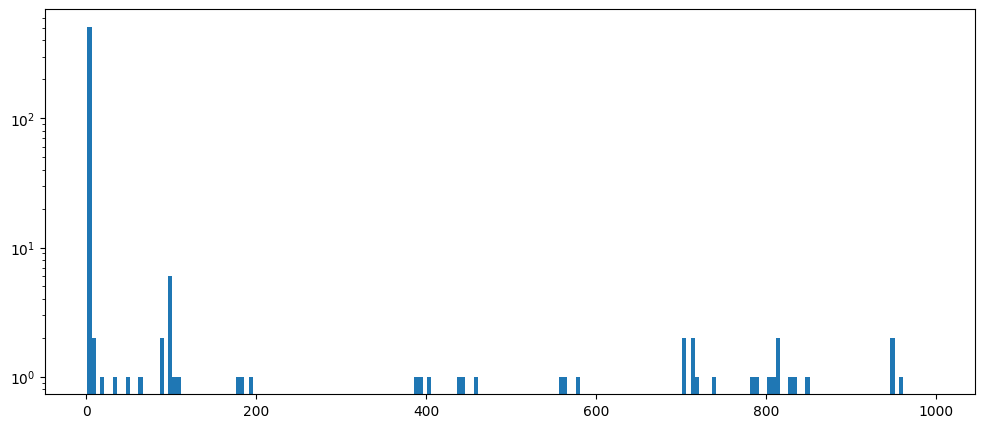

In [321]:
plt.hist(np.sqrt(df[df.samplePop > 0].samplePop), [x for x in range(1, 1000, 5)])
plt.yscale('log')
# plt.xscale('log')
plt.rcParams['figure.figsize'] = [12, 5]

